In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
import seaborn as sns

<Axes: >

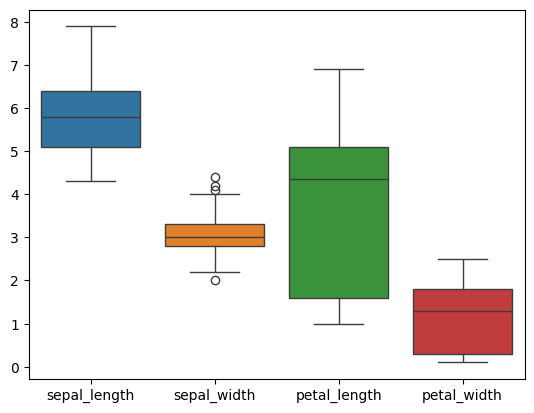

In [ ]:
sns.boxplot(df)

In [ ]:
q1 = df['sepal_width'].quantile(0.25)
q3 = df['sepal_width'].quantile(0.75)

iqr = q3 - q1

df = df[(df['sepal_width'] > q1 - 1.5*iqr) & (df['sepal_width'] < q3 + 1.5*iqr)]

<Axes: >

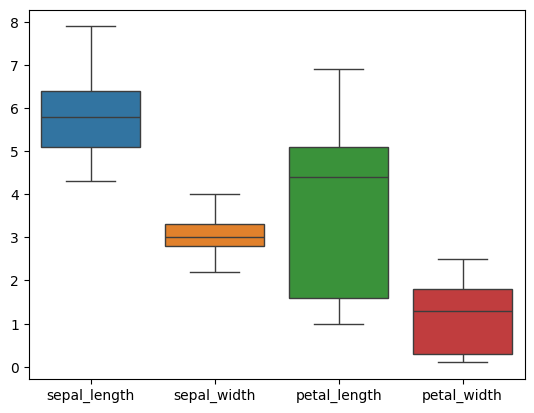

In [ ]:
sns.boxplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1].values
y = df['species'].values

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y_predict = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, y_predict)
conf_matrix

array([[17,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 15]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
print('Accuracy: ', accuracy_score(Y_test, y_predict))

print('Precision: ', precision_score(Y_test, y_predict, average = 'macro'))

Accuracy:  0.9545454545454546
Precision:  0.9488636363636364


In [ ]:
accuracy = accuracy_score(Y_test, y_predict)
error_rate = 1 - accuracy

print("Error Rate: ", error_rate)

Error Rate:  0.045454545454545414


# Done!